In [ ]:
# # Uninstall existing packages
# !pip uninstall -y tensorflow transformers

# # Reinstall the latest versions of the packages
# !pip install tensorflow transformers
# !pip install --upgrade scikit-learn

!pip install --upgrade scikit-learn

!pip install accelerate -U

# # Restart the runtime
# import os
# os.kill(os.getpid(), 9)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 25.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 6.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-

# **Creating the AutoModelForSequenceClassification model & the Metrics**

In [ ]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification
import torch
import torchvision

model_ckpt = "indobenchmark/indobert-large-p1"
tokenizer = BertTokenizer.from_pretrained(model_ckpt)

model = BertForSequenceClassification.from_pretrained(model_ckpt, num_labels=8)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/229k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-large-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 1024, padding_idx=0)
      (position_embeddings): Embedding(512, 1024)
      (token_type_embeddings): Embedding(2, 1024)
      (LayerNorm): LayerNorm((1024,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-23): 24 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=1024, out_features=1024, bias=True)
              (key): Linear(in_features=1024, out_features=1024, bias=True)
              (value): Linear(in_features=1024, out_features=1024, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=1024, out_features=1024, bias=True)
              (LayerNorm): LayerNorm((1

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)
    B_Acc = balanced_accuracy_score(labels, preds)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "Balanced Accuracy": B_Acc}

# **Import Non Stopwords & Stemming Cleaned Datasets**

In [ ]:
import os
!git clone https://github.com/G-Lin1k/SatriaDataScience


Cloning into 'SatriaDataScience'...
remote: Enumerating objects: 104, done.
remote: Counting objects: 100% (104/104), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 104 (delta 55), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (104/104), 1.75 MiB | 3.03 MiB/s, done.
Resolving deltas: 100% (55/55), done.


In [ ]:
os.chdir('SatriaDataScience')

In [ ]:
import pandas as pd

df = pd.read_csv("Dataset/Final/data_cleaned-no_stemstop.csv", sep=',')
df.head()

dframe= df.loc[:,["label", "c_text3"]]

In [ ]:
print("Missing Value: ", dframe.isnull().sum())
print("Duplicated Value: ", dframe.duplicated().sum())


Missing Value:  label      0
c_text3    3
dtype: int64
Duplicated Value:  261


In [ ]:
dframe[dframe.duplicated()]

,label,c_text3
59,Politik,sewaktu anies bersikap kritis ke kinerja pak p...
126,Pertahanan dan Keamanan,bulan januari ini serangan dari kubu dan kawan...
141,Pertahanan dan Keamanan,bulan januari ini serangan dari kubu dan kawan...
147,Pertahanan dan Keamanan,bulan januari ini serangan dari kubu dan kawan...
148,Ideologi,capres cawapres ganjar pranowo dan mahfud md m...
...,...,...
4555,Politik,netizen geger haikal hassan gunakan politik id...
4557,Politik,cukup lihat track recordnya ganjar pranowo dan...
4580,Ideologi,bukan cuma tampilan luarnya tapi kebijakan gan...
4610,Pertahanan dan Keamanan,bulan januari ini serangan dari kubu dan kawan...


In [ ]:
dframe.dropna(inplace=True)

In [ ]:
!pip install nltk


In [ ]:
import random
import nltk
from nltk.corpus import wordnet
import pandas as pd
from collections import Counter

nltk.download('omw-1.4')
nltk.download('wordnet')

# Fungsi untuk menemukan sinonim
def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='ind'):
        for lemma in syn.lemmas('ind'):
            synonyms.add(lemma.name())
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Fungsi untuk augmentasi teks dengan sinonim
def augment_text(text):
    words = text.split()
    new_text = words[:]

    random_word_idx = random.choice(range(len(words)))
    random_word = words[random_word_idx]
    synonyms = get_synonyms(random_word)

    if synonyms:
        synonym = random.choice(synonyms)
        new_text[random_word_idx] = synonym

    return ' '.join(new_text)

# Menghitung distribusi label
label_counts = Counter(dframe['label'])
print("Distribusi label sebelum augmentasi:", label_counts)


# Menyeimbangkan dataset
target_count = 2000

augmented_texts = []
augmented_labels = []

for label in label_counts:
    label_df = dframe[dframe['label'] == label]
    current_count = label_counts[label]

    if label == "Politik":
      continue
    elif (current_count >= target_count):
        label_df_sample = label_df.sample(target_count, random_state=42)
        augmented_texts.extend(label_df_sample['c_text3'].tolist())
        augmented_labels.extend(label_df_sample['label'].tolist())
    else:
        # Tambahkan data asli
        augmented_texts.extend(label_df['c_text3'].tolist())
        augmented_labels.extend(label_df['label'].tolist())

        # Augmentasi hingga mencapai target_count
        n_aug = target_count - current_count
        generated_texts = set(label_df['c_text3'].tolist())

        while len(generated_texts) < target_count:
            text = random.choice(label_df['c_text3'].tolist())
            augmented_text = augment_text(text)
            if augmented_text not in generated_texts:
                generated_texts.add(augmented_text)
                augmented_texts.append(augmented_text)
                augmented_labels.append(label)

# Membuat DataFrame baru dengan data yang telah di-augmentasi
augmented_df = pd.DataFrame({
    'c_text3': augmented_texts,
    'label': augmented_labels
})

augmented_df= pd.concat([augmented_df,dframe[dframe["label"]=="Politik"]])

# Menghitung distribusi label setelah augmentasi
new_label_counts = Counter(augmented_df['label'])
print("Distribusi label setelah augmentasi:", new_label_counts)

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package wordnet to /root/nltk_data...


Distribusi label sebelum augmentasi: Counter({'Politik': 2971, 'Sosial Budaya': 424, 'Ideologi': 343, 'Pertahanan dan Keamanan': 331, 'Ekonomi': 310, 'Sumber Daya Alam': 156, 'Demografi': 61, 'Geografi': 20})
Distribusi label setelah augmentasi: Counter({'Politik': 2971, 'Ideologi': 2080, 'Pertahanan dan Keamanan': 2054, 'Ekonomi': 2031, 'Sosial Budaya': 2014, 'Sumber Daya Alam': 2009, 'Demografi': 2001, 'Geografi': 2000})


In [ ]:
print("Missing Value: ", augmented_df.isnull().sum())
print("Duplicated Value: ", augmented_df.duplicated().sum())
print("Data Shape: ", augmented_df.shape)

Missing Value:  c_text3    0
label      0
dtype: int64
Duplicated Value:  261
Data Shape:  (17160, 2)


In [ ]:
dframe = augmented_df

while dframe.duplicated().sum() >0:
  dupl = dframe[dframe.duplicated()]

  dupl["c_text3"]= dupl["c_text3"].map(augment_text)

  dframe.drop_duplicates(inplace = True)

  dframe= pd.concat([dframe,dupl])



print("Missing Value: ", dframe.isnull().sum())
print("Duplicated Value: ", dframe.duplicated().sum())
print("Data Shape: ", dframe.shape)


<ipython-input-13-466ba4bdf7e8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dupl["c_text3"]= dupl["c_text3"].map(augment_text)


Missing Value:  c_text3    0
label      0
dtype: int64
Duplicated Value:  0
Data Shape:  (17160, 2)


In [ ]:
dframe.to_csv('data_cleaned_aug_no-stemstop.csv', sep=',', index=False,header=True)


In [ ]:
import pandas as pd
dframe = pd.read_csv("/content/SatriaDataScience/Dataset/Final/data_cleaned_aug_no-stemstop.csv", sep=',')
sda_df= dframe[dframe["label"]=="Sumber Daya Alam"]


'terus terang aku belum tahu ini tapi ternyata ini danau buatan antara jakarta selatan dan depok untuk pendampingan air hujan salah satu karya yang inovatif dari gubenur anies baswedan rekam jejak'

In [ ]:
import random
from random import sample

list1=list[1:2000]

for i in range(20):
  print(sample(sda_df.iloc[list1,0]))

IndexError: .iloc requires numeric indexers, got ['c_text3' 'label']

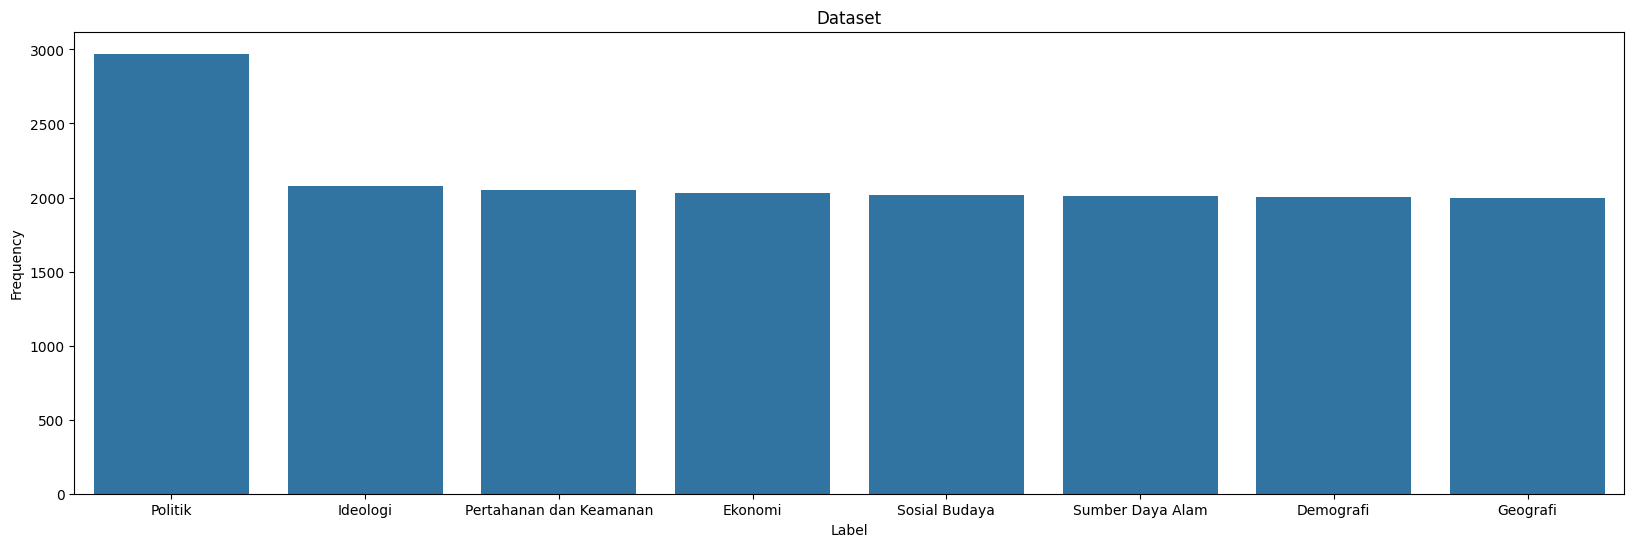

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

label_series = pd.Series(dframe ['label'])

value_counts = label_series.value_counts().reset_index()
value_counts.columns = ['label', 'frequency']

plt.figure(figsize=(20, 6))

sns.barplot(x='label', y='frequency', data=value_counts)
plt.title('Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.show()

In [ ]:
X = list(dframe['c_text3'])
y = list(dframe['label'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded= label_encoder.fit_transform(y)

In [ ]:
#The label index
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label to index mapping:", label_mapping)

Label to index mapping: {'Demografi': 0, 'Ekonomi': 1, 'Geografi': 2, 'Ideologi': 3, 'Pertahanan dan Keamanan': 4, 'Politik': 5, 'Sosial Budaya': 6, 'Sumber Daya Alam': 7}


In [ ]:
#SPLIT THE DATASET
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y_encoded, test_size =0.2, random_state =0)

# **Tokenize The Datasets**

In [ ]:
def tokenize(batch):
    return tokenizer(batch, padding='max_length', truncation=True, max_length=80, return_tensors='pt')

In [ ]:
train_encodings = tokenize(X_train)
test_encodings  = tokenize(X_test)

In [ ]:
train_encodings

{'input_ids': tensor([[    2, 18006, 30359,  ...,     0,     0,     0],
        [    2, 18006, 30359,  ...,     0,     0,     0],
        [    2,  1369, 19145,  ...,     0,     0,     0],
        ...,
        [    2,  2038, 15994,  ...,     0,     0,     0],
        [    2,   596, 20425,  ...,     0,     0,     0],
        [    2,   511,  6343,  ...,  3281,   626,     3]]), 'token_type_ids': tensor([[0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 1, 1, 1]])}

# **Convert the Encodings into Dataset Object**

In [ ]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self,encodings,labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self,idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item['labels']=torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

train_dataset = Dataset(train_encodings, y_train)
test_dataset = Dataset(test_encodings, y_test)

In [ ]:
test_dataset

# **Tuning Up and Train the Model**

In [ ]:
from transformers import Trainer, TrainingArguments
batch_size = 8

logging_steps = len(train_dataset) // batch_size

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs= 3,
    learning_rate = 1e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    warmup_steps = 500,
    evaluation_strategy ="epoch",
    weight_decay=0.01,
    disable_tqdm=False,
    logging_dir='./logs',
    logging_steps=logging_steps,
    log_level="error"
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1474: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset= train_dataset,
    eval_dataset = test_dataset,
    compute_metrics=compute_metrics,
)

In [ ]:
trainer.train()

<ipython-input-25-aece94a7f594>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


Epoch,Training Loss,Validation Loss,Accuracy,Balanced accuracy
1,0.863800,0.264984,0.920455,0.927533
2,0.171900,0.206192,0.948718,0.953923
3,0.075700,0.182273,0.955711,0.960647


<ipython-input-25-aece94a7f594>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-25-aece94a7f594>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-25-aece94a7f594>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
<ipython-input-25-aece94a7f594>:7: UserWarning: To copy construct from a 

TrainOutput(global_step=5148, training_loss=0.37045064302220676, metrics={'train_runtime': 3619.3828, 'train_samples_per_second': 11.379, 'train_steps_per_second': 1.422, 'total_flos': 5997099898183680.0, 'train_loss': 0.37045064302220676, 'epoch': 3.0})

In [ ]:
preds_output = trainer.predict(test_dataset)


<ipython-input-25-aece94a7f594>:7: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}


In [ ]:
preds_output.metrics

{'test_loss': 0.1822730153799057,
 'test_accuracy': 0.9557109557109557,
 'test_Balanced Accuracy': 0.9606470799085842,
 'test_runtime': 49.9021,
 'test_samples_per_second': 68.775,
 'test_steps_per_second': 8.597}

In [ ]:
y_pred=np.argmax(preds_output.predictions, axis =1)

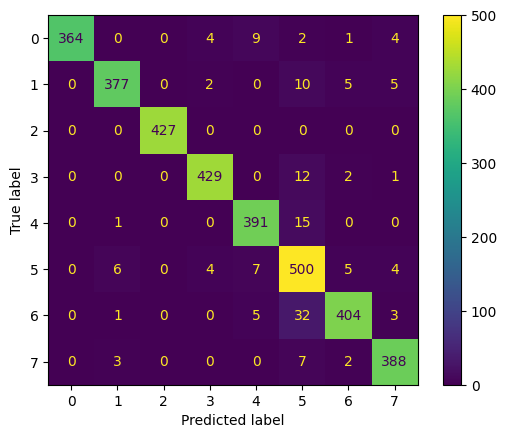

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_pred, y_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

In [ ]:
from torch.utils.data import Dataset, DataLoader

df_test = pd.read_csv("dataset_unlabeled_penyisihan_bdc_2024.csv", sep = ";")
test = list(df_test["Text"])

class TextDataset(Dataset):
    def __init__(self, texts, tokenizer, max_length):
        self.texts = texts
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]
        encoded = self.tokenizer(text, padding='max_length', truncation=True, return_tensors='pt', max_length=self.max_length)
        item = {key: val.squeeze(0) for key, val in encoded.items()}
        return item

# Create dataset and dataloader
df_set = TextDataset(test, tokenizer, 80)
test_dataloader = DataLoader(df_set, batch_size=2)

from tqdm import tqdm

predictions = []
for batch in tqdm(test_dataloader):
    # Move batch to appropriate device if using GPU
    batch = {k: v.to(device) for k, v in batch.items()}  # Assuming device is defined
    with torch.no_grad():
        outputs = trainer.model(**batch)
    predictions.extend(outputs.logits.argmax(dim=-1).cpu().numpy())

pred_labels = np.array(predictions)

100%|██████████| 500/500 [00:34<00:00, 14.48it/s]


In [ ]:
index_to_label = {v: k for k, v in label_mapping.items()}
string_labels = [index_to_label[label] for label in pred_labels]

jawaban = pd.read_csv("template_jawaban_penyisihan_bdc_2024.csv", sep = ";")

# jawaban["Kelas"] = string_labels
df_test["Label"] = string_labels

jawaban.to_csv('JawabanBDC.csv', sep=';', index=False,header=True)
df_test.to_csv('CocokinBDCIndo.csv', sep=';', index=False,header=True)

In [ ]:
import pandas as pd
jawaban = pd.read_csv("JawabanBDC.csv", sep = ";")
jawaban.head()

jawaban.to_csv('SD2024040000377.csv', sep=',', index=False,header=True)

In [ ]:
uji = pd.DataFrame(jawaban)
uji["Kelas"].value_counts()

Series([], Name: count, dtype: int64)

In [ ]:
import pandas as pd

cocokin = pd.read_csv("/content/IndoBERT_test_detailedversion.csv", sep = ";")
cocokin.isnull().sum()

cocokin["Label"].value_counts()

Label
Politik                    741
Ekonomi                    114
Pertahanan dan Keamanan     67
Sosial Budaya               41
Sumber Daya Alam            19
Ideologi                    17
Demografi                    1
Name: count, dtype: int64

In [ ]:
sda_df = cocokin[cocokin["Label"]== "Sumber Daya Alam"]
sda_df.sort_values(by="Text", ascending=True, inplace= True)

<ipython-input-25-19cfbb9aa9bc>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sda_df.sort_values(by="Text", ascending=True, inplace= True)


In [ ]:
sda_df

,IDText,Text,Label
256,TXT0257,@4H1vUCc4OsPEdHy0UWnX92MlRQJHDFMqP3pDL72/XBQ= ...,Sumber Daya Alam
432,TXT0433,@CsoUSFGxOYIuCzVuM6elGg23Rr/1ECBS8Ptp8k0aQyQ= ...,Sumber Daya Alam
735,TXT0736,@H/EqAXex69zeXoYlup5j0l0GJ4Y/uJKeH7OhmihxL3g= ...,Sumber Daya Alam
775,TXT0776,@H1tv24PMcql5H78lcZoTEYLuhPv3484hU4yhVWFQcJo= ...,Sumber Daya Alam
728,TXT0729,@KTqWCKoRB3mO8d9ysnqimUxwr6XjeebPa0b7eldJKs0= ...,Sumber Daya Alam
704,TXT0705,@LCjBfZHQxjn2rekd4KGjxxx5tt6Lg/Gu8bCAQZyAKM8= ...,Sumber Daya Alam
183,TXT0184,@NJySqTq1gUWxb558FJTOWpxCsJAHs085wrXAq0Bh+Bo= ...,Sumber Daya Alam
23,TXT0024,@RM55Bn/jTOYBntGhLJUBSxbB+yKFrIWQVNDlunZ3qJo= ...,Sumber Daya Alam
167,TXT0168,@UuiLLa3mJM7uLXnFSMp16Xir3xaR5qmoRt5079IKJA8= ...,Sumber Daya Alam
997,TXT0998,@datuakrajoangek Sbaiknya si gemot nga usah ik...,Sumber Daya Alam


In [ ]:
sda_df.iloc[2,1]

'@H/EqAXex69zeXoYlup5j0l0GJ4Y/uJKeH7OhmihxL3g= @aR6Gu9UkUVOCAn26FLNgBYKoJTY5gXaWwv8pm1R1oak= @1Dnm/Z6aYYkytHTiEti21yYt9PAq2QKX5rZ5Smn29iw= Kalau memang masuk ke Banten, ngapain Anies sampai mengubah reklamasi menjadi kawasan pantai? Pulau C, D, G diubah menjadi nama Pantai Maju, Pantai Kita, Pantai Bersama. Secara administratif wilayah dan tata ruang, pulau ini masuk ke Jakarta Utara. https://t.co/3XM1CGerWy'

In [ ]:
sda_df.iloc[1,1]

'@CsoUSFGxOYIuCzVuM6elGg23Rr/1ECBS8Ptp8k0aQyQ= PIK island yg dulu disegel anies itu jakarta. maen2 lah ke pik ke jembatan perbatasan jkt banten biar tau mana yg selesai'

# **PART 2 Import Stopwords & Stemming Cleaned Datasets**

In [ ]:

df_1 = pd.read_csv("/content/data_cleaned-with_stemstop.csv", sep =",")
df_1.head()

In [ ]:
df_1['c_text3'].isnull().sum()
df_1.dropna(inplace = True)

In [ ]:
df_1['c_text3'].duplicated().sum()



In [ ]:
dframe_1=df_1[['c_text3','label']]

In [ ]:
import random
import nltk
from nltk.corpus import wordnet
import pandas as pd
from collections import Counter

nltk.download('omw-1.4')
nltk.download('wordnet')

def get_synonyms(word):
    synonyms = set()
    for syn in wordnet.synsets(word, lang='ind'):
        for lemma in syn.lemmas('ind'):
            synonyms.add(lemma.name())
    if word in synonyms:
        synonyms.remove(word)
    return list(synonyms)

# Fungsi untuk augmentasi teks dengan sinonim
def augment_text(text):
    words = text.split()
    new_text = words[:]

    random_word_idx = random.choice(range(len(words)))
    random_word = words[random_word_idx]
    synonyms = get_synonyms(random_word)

    if synonyms:
        synonym = random.choice(synonyms)
        new_text[random_word_idx] = synonym

    return ' '.join(new_text)


# Menghitung distribusi label
label_counts = Counter(dframe_1['label'])
print("Distribusi label sebelum augmentasi:", label_counts)


# Menyeimbangkan dataset
target_count = 2000

augmented_texts = []
augmented_labels = []

for label in label_counts:
    label_df = dframe_1[dframe_1['label'] == label]
    current_count = label_counts[label]

    if label == "Politik":
      continue
    elif (current_count >= target_count):
        label_df_sample = label_df.sample(target_count, random_state=42)
        augmented_texts.extend(label_df_sample['c_text3'].tolist())
        augmented_labels.extend(label_df_sample['label'].tolist())
    else:
        # Tambahkan data asli
        augmented_texts.extend(label_df['c_text3'].tolist())
        augmented_labels.extend(label_df['label'].tolist())

        # Augmentasi hingga mencapai target_count
        n_aug = target_count - current_count
        generated_texts = set(label_df['c_text3'].tolist())

        while len(generated_texts) < target_count:
            text = random.choice(label_df['c_text3'].tolist())
            augmented_text = augment_text(text)
            if augmented_text not in generated_texts:
                generated_texts.add(augmented_text)
                augmented_texts.append(augmented_text)
                augmented_labels.append(label)

# Membuat DataFrame baru dengan data yang telah di-augmentasi
augmented_df = pd.DataFrame({
    'c_text3': augmented_texts,
    'label': augmented_labels
})

augmented_df= pd.concat([augmented_df,dframe_1[dframe_1["label"]=="Politik"]])

# Menghitung distribusi label setelah augmentasi
new_label_counts = Counter(augmented_df['label'])
print("Distribusi label setelah augmentasi:", new_label_counts)

In [ ]:
print("Missing Value: ", augmented_df.isnull().sum())
print("Duplicated Value: ", augmented_df.duplicated().sum())
print("Data Shape: ", augmented_df.shape)

In [ ]:
dframe = augmented_df

while dframe.duplicated().sum() >0:
  dupl = dframe[dframe.duplicated()]

  dupl["c_text3"]= dupl["c_text3"].map(augment_text)

  dframe.drop_duplicates(inplace = True)

  dframe= pd.concat([dframe,dupl])



print("Missing Value: ", dframe.isnull().sum())
print("Duplicated Value: ", dframe.duplicated().sum())
print("Data Shape: ", dframe.shape)


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

label_series = pd.Series(dframe ['label'])

value_counts = label_series.value_counts().reset_index()
value_counts.columns = ['label', 'frequency']

plt.figure(figsize=(20, 6))

sns.barplot(x='label', y='frequency', data=value_counts)
plt.title('Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.show()

In [ ]:
value_counts

dframe.describe()

In [ ]:
dframe.to_csv('data_cleaned_aug_stemstop.csv', sep=',', index=False,header=True)

In [ ]:
|X_1= list(augmented_df_1['c_text3'])
y_1 = list(augmented_df_1['label'])

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_encoded_1= label_encoder.fit_transform(y_1)

In [ ]:
#The label index
label_mapping = dict(zip(label_encoder.classes_, range(len(label_encoder.classes_))))
print("Label to index mapping:", label_mapping)

In [ ]:
from sklearn.model_selection import train_test_split

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_encoded_1, test_size =0.2, random_state =0)

In [ ]:
dframe_1[dframe_1.duplicated()].c_text3.groupby(df_1['label']).count()

In [ ]:
def tokenize(batch):
    return tokenizer(batch, padding='max_length', truncation=True, max_length=80, return_tensors='pt')

In [ ]:
class Dataset(torch.utils.data.Dataset):
  def __init__(self,encodings,labels):
    self.encodings = encodings
    self.labels = labels

  def __getitem__(self,idx):
    item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
    item['labels']=torch.tensor(self.labels[idx])
    return item

  def __len__(self):
    return len(self.labels)

In [ ]:
train_encodings_1 = tokenize(X_train_1)
test_encodings_1  = tokenize(X_test_1)

train_dataset_1 = Dataset(train_encodings_1, y_train_1)
test_dataset_1 = Dataset(test_encodings_1, y_test_1)

In [ ]:
from transformers import Trainer, TrainingArguments
batch_size = 8

logging_steps = len(train_dataset_1) // batch_size

training_args = TrainingArguments(
    output_dir='./results',
    num_train_epochs=3,
    learning_rate = 1e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    warmup_steps = 500,
    evaluation_strategy ="epoch",
    weight_decay=0.01,
    disable_tqdm=False,
    logging_dir='./logs',
    logging_steps=logging_steps,
    log_level="error"
)

In [ ]:
trainer_1 = Trainer(
    model=model,
    args=training_args,
    train_dataset= train_dataset_1,
    eval_dataset = test_dataset_1,
    compute_metrics=compute_metrics,
)

trainer_1.train()

In [ ]:
preds_output_1 = trainer.predict(test_dataset_1)

In [ ]:
preds_output_1.metrics

In [ ]:
y_pred_1=np.argmax(preds_output_1.predictions, axis =1)

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm_1= confusion_matrix(y_pred_1, y_test_1)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm)
disp_1.plot()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

y_test_series = pd.Series(y_test_1)
y_train_series = pd.Series(y_train_1)

value_counts_B = y_test_series.value_counts().reset_index()
value_counts_A = y_train_series.value_counts().reset_index()
value_counts_B.columns = ['label', 'frequency']
value_counts_A.columns = ['label', 'frequency']

plt.figure(figsize=(20, 6))


plt.subplot(1, 2, 1)
sns.barplot(x='label', y='frequency', data=value_counts_A)
plt.title('training Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.barplot(x='label', y='frequency', data=value_counts_B)
plt.title('Testing Dataset')
plt.xlabel('Label')
plt.ylabel('Frequency')

plt.show()